In [1]:
!pip install Qiskit ipywidgets
!pip install qiskit
!pip install qiskit_optimization
!pip install qiskit-optimization
!pip install cplex
!pip install ibm-quantum-widgets
!pip install docplex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.5 MB 36.3 MB/s 
     |████████████████████████████████| 18.0 MB 1.3 MB/s 
     |████████████████████████████████| 240 kB 20.2 MB/s 
     |████████████████████████████████| 198 kB 47.5 MB/s 
     |████████████████████████████████| 54 kB 2.3 MB/s 
     |████████████████████████████████| 112 kB 44.4 MB/s 
     |████████████████████████████████| 1.6 MB 41.7 MB/s 
     |████████████████████████████████| 49 kB 7.1 MB/s 
     |████████████████████████████████| 37.5 MB 1.3 MB/s 
     |████████████████████████████████| 49 kB 6.2 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
     |████████████████████████████████| 943 kB 60.4 MB/s 
     |████████████████████████████████| 4.0 MB 49.8 MB/s 
     |████████████████████████████████| 112 kB 58.2 MB/s 
  Created wheel for Qiskit: filename=qiskit-0.36.2-py3-none-any.whl size=11933 sha256=1baa15aa6

In [2]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
#provider = IBMQ.load_account()

In [3]:
import time
from typing import List, Optional, Any
import numpy as np
import matplotlib.pyplot as plt

from docplex.mp.model import Model

from qiskit import BasicAer
from qiskit.algorithms import QAOA, NumPyMinimumEigensolver
from qiskit_optimization.algorithms import CobylaOptimizer, MinimumEigenOptimizer
from qiskit_optimization.problems import QuadraticProgram
from qiskit_optimization.algorithms.admm_optimizer import ADMMParameters, ADMMOptimizer
from qiskit_optimization.translators import from_docplex_mp

from qiskit.utils.algorithm_globals import algorithm_globals
algorithm_globals.massive=True

# If CPLEX is installed, you can uncomment this line to import the CplexOptimizer.
# CPLEX can be used in this tutorial to solve the convex continuous problem,
# but also as a reference to solve the QUBO, or even the full problem.
#
# from qiskit.optimization.algorithms import CplexOptimizer

In [4]:
# define COBYLA optimizer to handle convex continuous problems.
cobyla = CobylaOptimizer()

# define QAOA via the minimum eigen optimizer
qaoa = MinimumEigenOptimizer(QAOA(quantum_instance=BasicAer.get_backend("statevector_simulator")))

# exact QUBO solver as classical benchmark
exact = MinimumEigenOptimizer(NumPyMinimumEigensolver())  # to solve QUBOs

# in case CPLEX is installed it can also be used for the convex problems, the QUBO,
# or as a benchmark for the full problem.
#
# cplex = CplexOptimizer()

In [5]:
# construct model using docplex
mdl = Model("ex7")

#3 servers and 5 virtual machines
#all servers have the same idle and dynamic power consumption
#all servers have the same maximum cpu capacity

s0 = mdl.binary_var(name="s0")
s1 = mdl.binary_var(name="s1")
s2 = mdl.binary_var(name="s2")

v00 = mdl.binary_var(name="v00")
v10 = mdl.binary_var(name="v10")
v20 = mdl.binary_var(name="v20")
v30 = mdl.binary_var(name="v30")
v40 = mdl.binary_var(name="v40")
v01 = mdl.binary_var(name="v01")
v11 = mdl.binary_var(name="v11")
v21 = mdl.binary_var(name="v21")
v31 = mdl.binary_var(name="v31")
v41 = mdl.binary_var(name="v41")
v02 = mdl.binary_var(name="v02")
v12 = mdl.binary_var(name="v12")
v22 = mdl.binary_var(name="v22")
v32 = mdl.binary_var(name="v32")
v42 = mdl.binary_var(name="v42")

#pi = mdl.continuous_var(name="pi")
#pd = mdl.continuous_var(name="pd")
pi = 10
pd = 5

c = 100

u00 = mdl.integer_var(name="u00")
u10 = mdl.integer_var(name="u10")
u20 = mdl.integer_var(name="u20")
u30 = mdl.integer_var(name="u30")
u40 = mdl.integer_var(name="u40")
u01 = mdl.integer_var(name="u01")
u11 = mdl.integer_var(name="u11")
u21 = mdl.integer_var(name="u21")
u31 = mdl.integer_var(name="u31")
u41 = mdl.integer_var(name="u41")
u02 = mdl.integer_var(name="u02")
u12 = mdl.integer_var(name="u12")
u22 = mdl.integer_var(name="u22")
u32 = mdl.integer_var(name="u32")
u42 = mdl.integer_var(name="u42")

In [6]:
sum0 = (u00*v00+u10*v10+u20*v20+u30*v30+u40*v40)
sum1 = (u01*v01+u11*v11+u21*v21+u31*v31+u41*v41)
sum2 = (u02*v02+u12*v12+u22*v22+u32*v32+u42*v42)

In [7]:
mdl.maximize((pi*s0+pd*(sum0))+(pi*s1+pd*(sum1))+(pi*s2+pd*(sum2)))
#mdl.add_constraint(v + 2 * w + t + u <= 3, "cons1")
#mdl.add_constraint(v + w + t >= 1, "cons2")
#mdl.add_constraint(v + w == 1, "cons3")

# load quadratic program from docplex model
qp = from_docplex_mp(mdl)
print(qp.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: ex7

Maximize
 obj: 10 s0 + 10 s1 + 10 s2 + [ 10 v00*u00 + 10 v10*u10 + 10 v20*u20
      + 10 v30*u30 + 10 v40*u40 + 10 v01*u01 + 10 v11*u11 + 10 v21*u21
      + 10 v31*u31 + 10 v41*u41 + 10 v02*u02 + 10 v12*u12 + 10 v22*u22
      + 10 v32*u32 + 10 v42*u42 ]/2
Subject To

Bounds
 0 <= s0 <= 1
 0 <= s1 <= 1
 0 <= s2 <= 1
 0 <= v00 <= 1
 0 <= v10 <= 1
 0 <= v20 <= 1
 0 <= v30 <= 1
 0 <= v40 <= 1
 0 <= v01 <= 1
 0 <= v11 <= 1
 0 <= v21 <= 1
 0 <= v31 <= 1
 0 <= v41 <= 1
 0 <= v02 <= 1
 0 <= v12 <= 1
 0 <= v22 <= 1
 0 <= v32 <= 1
 0 <= v42 <= 1

Binaries
 s0 s1 s2 v00 v10 v20 v30 v40 v01 v11 v21 v31 v41 v02 v12 v22 v32 v42

Generals
 u00 u10 u20 u30 u40 u01 u11 u21 u31 u41 u02 u12 u22 u32 u42
End



In [8]:
admm_params = ADMMParameters(
                            rho_initial=1001,
                            beta=1000,
                            factor_c=900,
                            maxiter=100,
                            three_block=True, tol=1.e-6
                        )

In [9]:
# define QUBO optimizer
qubo_optimizer = exact
# qubo_optimizer = cplex  # uncomment to use CPLEX instead

# define classical optimizer
convex_optimizer = cobyla
# convex_optimizer = cplex  # uncomment to use CPLEX instead

# initialize ADMM with classical QUBO and convex optimizer
admm = ADMMOptimizer(params=admm_params,
                     qubo_optimizer=qubo_optimizer,
                     continuous_optimizer=convex_optimizer,
                    )

In [10]:
# run ADMM to solve problem
%tb
#algorithm_globals.massive=True
#algorithm_globals = (massive=True)
#admm.OperatorBase._check_massive(massive=True)
result = admm.solve(qp)

No traceback available to show.


In [11]:
print("x={}".format(result.x))
print("fval={:.2f}".format(result.fval))

x=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
fval=0.00


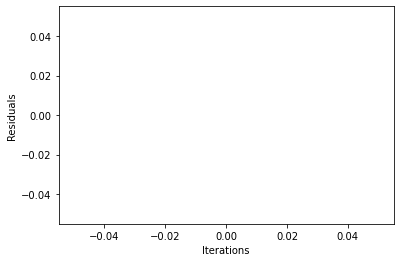

In [12]:
plt.plot(result.state.residuals)
plt.xlabel("Iterations")
plt.ylabel("Residuals")
plt.show()

In [13]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright